# Mini Task 1
##### Group Name: EMA
##### Group Members: Edanur Kahvecioglu, Melike Merdan, Asena Ciloglu

In [1]:
import os
os.chdir("C:\Python_Files\ADAMS")

In [2]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from keras import backend as K
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras import optimizers


Using TensorFlow backend.


## Data Importing & Visualization

In [3]:
data = pd.read_csv("ConversionDataSet.csv", index_col=False, encoding='utf-8')

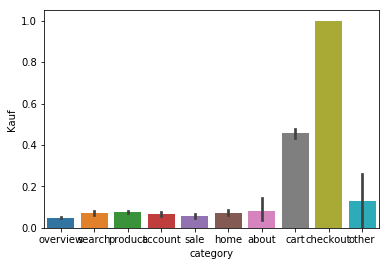

In [4]:
sns.barplot(x="category", y="Kauf", data=data)

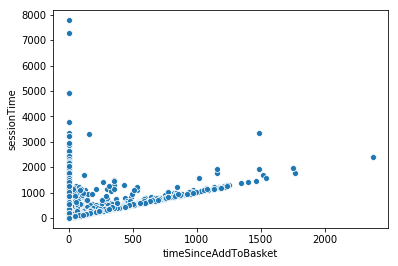

In [5]:
sns.scatterplot(x="timeSinceAddToBasket", y="sessionTime", data=data)

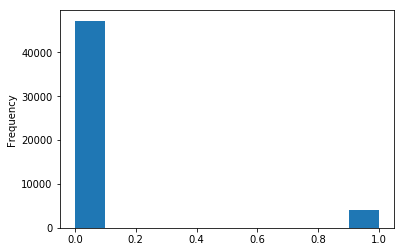

In [6]:
data["Kauf"].plot(kind='hist')

As we see that our data is highly imbalanced, we tried to solve by using sampling techniques.


## Oversampling

In [1]:
# from sklearn.utils import resample
# Separate majority and minority classes
# data_majority = data[data.Kauf==0]
# data_minority = data[data.Kauf==1]
 
# # Upsample minority class
# data_minority_upsampled = resample(data_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=47237,    # to match majority class
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
# # Display new class counts
# data_upsampled.Kauf.value_counts()

## Input Preparation

In [8]:
seed=42
y = data['Kauf']

In [9]:
dummy_browser = pd.get_dummies(data['browser'])
dummy_category = pd.get_dummies(data['category'])
dummy_operatingSystem = pd.get_dummies(data['operatingSystem'])
X = data.drop(["Kauf", "browser", "category", "operatingSystem"], axis=1)
X = pd.concat([X, dummy_browser, dummy_category, dummy_operatingSystem], axis=1)
X.shape


(51349, 129)

Variables "broswer", "category" and "operatingSystem" was initially defined as objects.
While running the codes, we could not use those objects, we first tried to get them into the model as creating factors from them.
This solution didn't work in our case, so created dummy variables from each of them.

Other than that, many of the variables consist binary values, 0 and 1, and most of those variables highly consist 0 values.
In order to get those variables in a more interpretable scale, we applied the standardization method.

In [ ]:
#Standardize X
scaler = StandardScaler()
X=scaler.fit_transform(X)


C:\Python_Files\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Python_Files\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Smote

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

Number transactions X_train dataset:  (35944, 129)
Number transactions y_train dataset:  (35944,)
Number transactions X_test dataset:  (15405, 129)
Number transactions y_test dataset:  (15405,)


In [ ]:
y_test = np_utils.to_categorical(y_test)
y_train = np_utils.to_categorical(y_train)
y_train_res = np_utils.to_categorical(y_train_res)

After running the model, we observed that Smote technique gives better learners than basic oversampling.

In [ ]:
print(y_train_res.mean())
print(y.mean())

0.5
0.08007945626983973


Smote method duplicated the number of observation that resulted in purchasing.
By doing this, we increased the percetange of Kauf's from 0.08 to 0.5 which made us data perfectly balanced.

## Data Split (not necessary for smote)

In [ ]:
# # Let's split our data set
# from sklearn.model_selection import train_test_split
# #there will be a lot of random actions, let's set the seed right away


# #X = data.iloc[:,:-1] #all features

# #Keep in mind that this data set is already normalized, which leads to a leakage of information from train set to test set
# #When you are working with a dataset, make sure you normalize the variables in testset according to the parameters of the train set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
    
# print (X_train.shape)
# print(X_test.shape)
# print(y_train.shape) 
# print(y_test.shape)


## Model (see drop out below)

As a start, we tried to do a simple two hidden layer model, and set our batch_size, epoch, optimizer parameters according to our will.

In [ ]:
# model = Sequential()

# model.add(Dense(512,
#                 activation='relu', #activation function
#                 kernel_initializer=keras.initializers.he_normal(seed=seed), 
#                 bias_initializer='zeros', 
#                 input_shape=(93,))) # or better X_train.shape[1] 
# model.add(Dense(128, activation='relu',kernel_initializer=keras.initializers.he_normal(seed=seed),bias_initializer='zeros')) 
# model.add(Dense(2, activation='softmax',kernel_initializer=keras.initializers.he_normal(seed=seed),bias_initializer='zeros')) 
# #model.add(Dense(2, activation='sigmoid',kernel_initializer=keras.initializers.he_normal(seed=seed),bias_initializer='zeros')) 

# model.summary()

# from keras import optimizers
# #sgd = optimizers.SGD(lr=0.0001)
# #adam = keras.optimizers.Adam(lr=0.0001, decay=0.6)

# model.compile(optimizer = keras.optimizers.Adam(lr=0.001, decay=0.5), loss='categorical_crossentropy', metrics=['accuracy'])

# batch_size = 120 #1 for online SGD
# epochs = 50

# story = model.fit(X_train, y_train,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1,validation_data=(X_test, y_test), shuffle=True)

#score = model.evaluate(X_test, y_test, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

## Model w/ Drop Out /accuracy

Due to high number of inputs, 97 in original data and overall 129 after adding dummy columns, we preferred using a better method to prevent overfitting.
Drop out enables us to eliminate some neural connections.

In [ ]:
###dropout
def create_model():
  model = Sequential()
  model.add(Dense(512, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed), input_shape=(129,)))
  model.add(Dropout(0.001))
  model.add(Dense(512, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed)))
  model.add(Dropout(0.001))
  model.add(Dense(2, activation='softmax', kernel_initializer=keras.initializers.he_normal(seed=seed),bias_initializer='zeros'))
  model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.0001, decay=0.6),
              metrics=['accuracy'])
  return model


We trained our model with accuracy metric, later we changed it to AUC.

## Grid Search (Hyperparameters)

In [ ]:


model = KerasClassifier(build_fn=create_model, verbose=0)
# Let's define the grid search parameters
batchsize = [700, 768, 850]
epochs = [110, 120, 130]

#Set the grid
param_grid = dict(batch_size=batchsize, epochs=epochs)# setting a dictionary to store the results
param_grid 



{'batch_size': [700, 768, 850], 'epochs': [110, 120, 130]}

After running our grid search for hyperparameters many times, it led us to increase batch size and epoch as much as we can.
We decided to stop after the result of epoch=130 and batchsize=850 due to time restriction.

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,cv=3)#parallelization, here using all processors
results = grid.fit(X_train_res, y_train_res) #remember that we don't want to use the test set in CV
print("Best: %f using %s" % (results.best_score_, results.best_params_))

## Grid Search (Optimizers)

In [ ]:
def optim (optimizer='SGD'):
    model = Sequential()
    model.add(Dense(512, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed), input_shape=(129,)))
    model.add(Dropout(0.001))
    model.add(Dense(512, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed)))
    model.add(Dropout(0.001))
    model.add(Dense(2, activation='softmax', kernel_initializer=keras.initializers.he_normal(seed=seed),bias_initializer='zeros'))
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=optim, epochs=130, batch_size=850, verbose=0)
# define the grid search parameters
optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizers) # setting a dictionary to store the results
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
results = grid.fit(X_train_res, y_train_res)

# Our results (reember these are the resultson the hold-out data)
print("Best: %f using %s" % (results.best_score_, results.best_params_))

After running the model for optimal optimizer, RMSprop seemed the most convivient one.
With RMSprop, we set our learning rate and decay rate below.

## Model w/optimal values/auc

In [ ]:
 model = Sequential()
 model.add(Dense(512, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed), input_shape=(129,)))
 model.add(Dropout(0.001))
 model.add(Dense(512, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed)))
 model.add(Dropout(0.001))
 model.add(Dense(2, activation='softmax', kernel_initializer=keras.initializers.he_normal(seed=seed),bias_initializer='zeros'))

In [ ]:

def auc(y_true, y_pred):
  auc = tf.metrics.auc(y_true, y_pred)[1]
  K.get_session().run(tf.local_variables_initializer())
  return auc
 

  
model.compile(loss='categorical_crossentropy',
              optimizer= keras.optimizers.RMSprop(lr=0.0001, decay=0.8),
              metrics=[auc])
  
batch_size=850
epochs=130
history = model.fit(X_train_res, y_train_res,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



## Model Evaluation

In [ ]:
def show_history(history):
    plt.plot(history.history['auc'])
    plt.plot(history.history['val_auc'])
    plt.ylabel('AUC')
    plt.xlabel('epoch')
    plt.legend(['train_auc', 'test_auc'], loc='best')
    plt.show()

show_history(history)

## Predictions

In [ ]:
predictions = model.predict_classes(X_test, verbose=0)

#def write_predictions(predictions, fname):
#pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions}).to_csv(fname, index=False, header=True)

#write_predictions(predictions, "Mini_challenge0.csv")

In [ ]:
predictions.mean()

This task had been initially created and prepared in Colab.